## Penguin gender classification

### Introduction

The project aims to study three different types of penguins that are found in the Antarctic region. The study will involve the physical measurements of these penguins, which will be used to build a supervised learning model. This model will be used to classify the gender of the penguins based on their species and physical characteristics.

During the project execution, various techniques will be explored to analyze the collected data, and the process of building the model will be demonstrated.

The study conducted by Horst, Hill & Gorman in 2020 aimed to determine how environmental factors influence sexual segregation. According to their research, a harsh environment wherein it's challenging to find food will increase the difference in size between males and females. They arrived at their theory by observing the size differences in various times and locations representing different environments.

This project's primary focus is to predict the gender of penguins using only their physical measurements. It is a **supervised learning** problem for a **binary classification task**. 

Since the size difference between males and females depends on the environment they live in, removing environmental information such as location and time makes gender prediction challenging. Additionally, the small dataset size of only 333 valid observations makes it prone to overfitting. This small dataset represents the challenges faced when collecting data in the field, which is a common issue in many studies. Therefore, studying the processing of a small dataset such as this provides valuable experience. We will address these challenges in the following sections.

In [513]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('penguins.csv')

### The dataset

This dataset consists information about penguins found on a few islands in Antarctic. Data were collected by Dr. Kristen Gorman and the Palmer Station, and Antarctica LTER. The dataset can be found [here](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3) .

Citation:(Horst, Hill & Gorman, 2020) <br>
Reference: palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.

The dataset is tabulated data, consisting of 346 observations. The first 5 rows are shown below

In [514]:
# Show the first 5 rows of the dataframe to get an idea of the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


#### What is in the dataset

This dataset provides information about penguin characteristics, including physical measurements and demographic information. Each row of the data frame represents an individual penguin observation. There are eight columns:

<style> 
    .variables_table {font-size: smaller;}
    .variables_table tr:nth-child(odd) { background-color: #eee; } 
    .variables_table th {border: none;}
    .variables_table td {border: none;}
    .variables_table td:nth-child(3n+2) { text-align:right; }
</style> 
<table class="variables_table" style="border-collapse: collapse;">
    <tr>
        <th></th>
        <th align="right">Variable</th>
        <th align="left">Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>species</td>
        <td>The species of the penguin (e.g., Adelie)</td>
    </tr>
    <tr>
        <td>1</td>
        <td>island</td>
        <td>The island where the observation was made (e.g., Torgersen)</td>
    </tr>
    <tr>
        <td>2</td>
        <td>bill_length_mm</td>
        <td>The length of the penguin's bill in millimeters</td>
    </tr>
    <tr>
        <td>3</td>
        <td>bill_depth_mm</td>
        <td>The depth of the penguin's bill in millimeters</td>
    </tr>
    <tr>
        <td>4</td>
        <td>flipper_length_mm</td>
        <td>The length of the penguin's flipper in millimeters</td>
    </tr>
    <tr>
        <td>5</td>
        <td>body_mass_g</td>
        <td>The body mass of the penguin in grams</td>
    </tr>
    <tr>
        <td>6</td>
        <td>sex</td>
        <td>The sex of the penguin (e.g., male, female)</td>
    </tr>
    <tr>
        <td>7</td>
        <td>year</td>
        <td>The year of the observation</td>
    </tr>
</table>

The bill length and depth are defined as follows:

<img src="culmen_depth.png" alt="Bill length and depth" width="500" height="322">

The image credit: https://allisonhorst.github.io/palmerpenguins/

In [515]:
# Show all species
print(df['species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


By the way, this is how they look like:

<img src="Adelie.jpg" alt="Adelie" width="300" height="500">
<img src="Gentoo.jpg" alt="Gentoo" width="300" height="500">
<img src="Chinstrap.jpg" alt="Chinstrap" width="400" height="500">

In this project, we will try to identify their gender only with their physical measurements.

In [516]:
# Show all islands
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


Here is the map with the three islands:

![The map of the islands](map.jpg)

In [517]:
# Check where the penguins live
print(df[df.species == 'Adelie'].island.unique())
print(df[df.species == 'Gentoo'].island.unique())
print(df[df.species == 'Chinstrap'].island.unique())

['Torgersen' 'Biscoe' 'Dream']
['Biscoe']
['Dream']


As Adelie lives on all three islands, they are more susceptible to the living conditions in different environments. According to the original study, the size difference between females and males should vary more than other species. We will verify this point in the latter sections.

### Data Cleanup

As we can see in the first 5 lines, there are NaN in the dataset representing missing data. Those rows with missing values need to be purged. Since this is a small dataset, we want to conserve data as much as possible. Before dropping NaN data, we check all the rows with NaN values.

In [518]:
# print all the rows with missing values
print(df[df.isnull().any(axis=1)])


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  year  
3            NaN  NaN  2007  
8         3475.0  NaN  2007

As the gender information are missing in these rows, we have to drop them since *sex* is the classification target.

In [519]:
# Remove rows with missing values
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


The variable names are little bit tedious. We rename them to remove the unit suffix.

In [520]:
df.rename(columns={'bill_length_mm': 'bill_length', 'bill_depth_mm': 'bill_depth', 'flipper_length_mm': 'flipper_length', 'body_mass_g' : 'body_mass'}, inplace=True)
df.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


As mentioned earlier, we will not use the environmental information, so the columns *island* and *year* are dropped.

In [521]:
df = df.drop(columns=['island', 'year'])
df.head()

,species,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
4,Adelie,36.7,19.3,193.0,3450.0,female
5,Adelie,39.3,20.6,190.0,3650.0,male


#### Basic validation

In [522]:
# Check all possible values for 'sex'
print(df['sex'].unique())

# Check the range of values for the numerical columns in the dataframe for any outliers

print(df['bill_length'].min(), df['bill_length'].max())
print(df['bill_depth'].min(), df['bill_depth'].max())
print(df['flipper_length'].min(), df['flipper_length'].max())
print(df['body_mass'].min(), df['body_mass'].max())

['male' 'female']
32.1 59.6
13.1 21.5
172.0 231.0
2700.0 6300.0


The data range looks normal for their ranges. We will validate it further in the visualization section.

#### Data types

*Species* and *Sex* are categorical data, it is easier for further processing to change them to numerical values

In [523]:
# Change the species to a numerical value
df['species'] = df['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})

# Define a variable to keep the original species names
species_names = ['Adelie', 'Gentoo', 'Chinstrap']

# Change sex to a numerical value
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

# Define a variable to keep the original gender names
gender_names = ['female', 'male']

df.head()

,species,bill_length,bill_depth,flipper_length,body_mass,sex
0,0,39.1,18.7,181.0,3750.0,1
1,0,39.5,17.4,186.0,3800.0,0
2,0,40.3,18.0,195.0,3250.0,0
4,0,36.7,19.3,193.0,3450.0,0
5,0,39.3,20.6,190.0,3650.0,1


In [524]:
# Further check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    int64  
 1   bill_length     333 non-null    float64
 2   bill_depth      333 non-null    float64
 3   flipper_length  333 non-null    float64
 4   body_mass       333 non-null    float64
 5   sex             333 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 18.2 KB


The data types are all numerical types now.

#### Conclusion

In this cleanning phase, we did the following cleaning to the original dataset:

1. Removed rows with missing data that are crucial to the classification problem;
2. Dropped two columns they are irrelevant;
3. Confirmed that there is no outliers;
4. Changed categorical data types to numerical data types;

However, we did not normalize the data, which will be done inside the model.

## Exploratory Data Analysis

#### Histogram

Histograms are made here to help understanding the range/distribution of each feature and the target

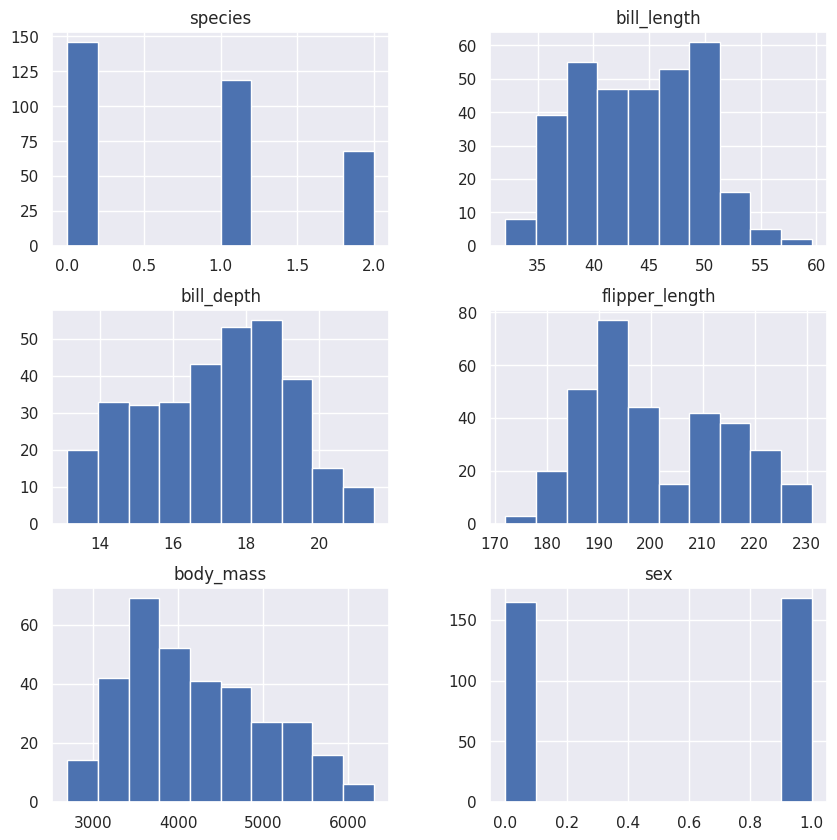

In [525]:
# create histogram for each column of the data frame
df.hist(figsize=(10, 10))
plt.show()

From the histograms, we can further confirm that there is **no outlier** in the dataset. The population of each species is different - we have more Adelies, followed by Gentoo and Chinstrap. Luckily though, the difference is in acceptable range, 

Furthermore, the population of the both sex (the target) is almost equal, which means **the dataset is banlanced**. 

#### Correlation

In this section, we check the correlation among the features. As the $species$ is a categorical, it does not make much sense to calculate the correlation of $species$ against other features. The feauture $sex$, on the other hand, even though is also categorical, its values can only be 0 or 1, so that correlation still makes sense.

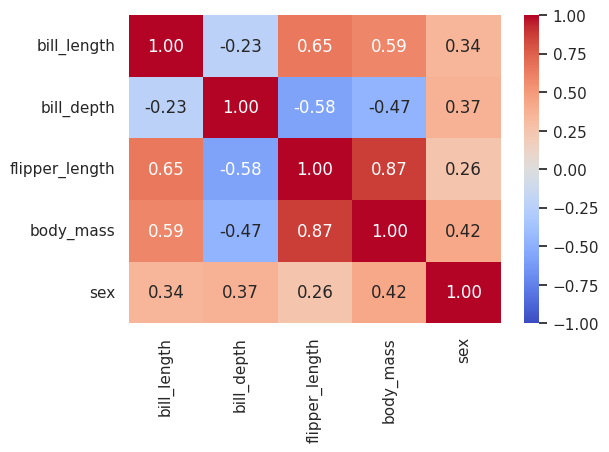

In [526]:
# Visualizing correlation matrix using a heatmap
# Set color map to have light blue background
sns.set()

dfcorr = df.iloc[:,1:].corr() # Exclude the 'species' column
plt.figure(figsize=(6, 4))
sns.heatmap(dfcorr, annot=True, cmap='coolwarm', vmin=-1.0, vmax=1.0, fmt='.2f', linewidths=0)
plt.show()

The correlation shows some facts among the features. For example, the length of the flipper is highly correlated with the body mass, which is expected as both are measurements of the size of the body. Another fact is that males tend to have larger values on all the features, which we will exploit for the prediction of the gender. The depth of the bill is negatively related to other body parts, showing it as a distinctive feature.

#### Pair plot

To visualize the relationship between the features and their impact on species classification, a pair plot is created for the data.

The target (sex) is categorical data, it is used as the 'hue' to render the clusters.

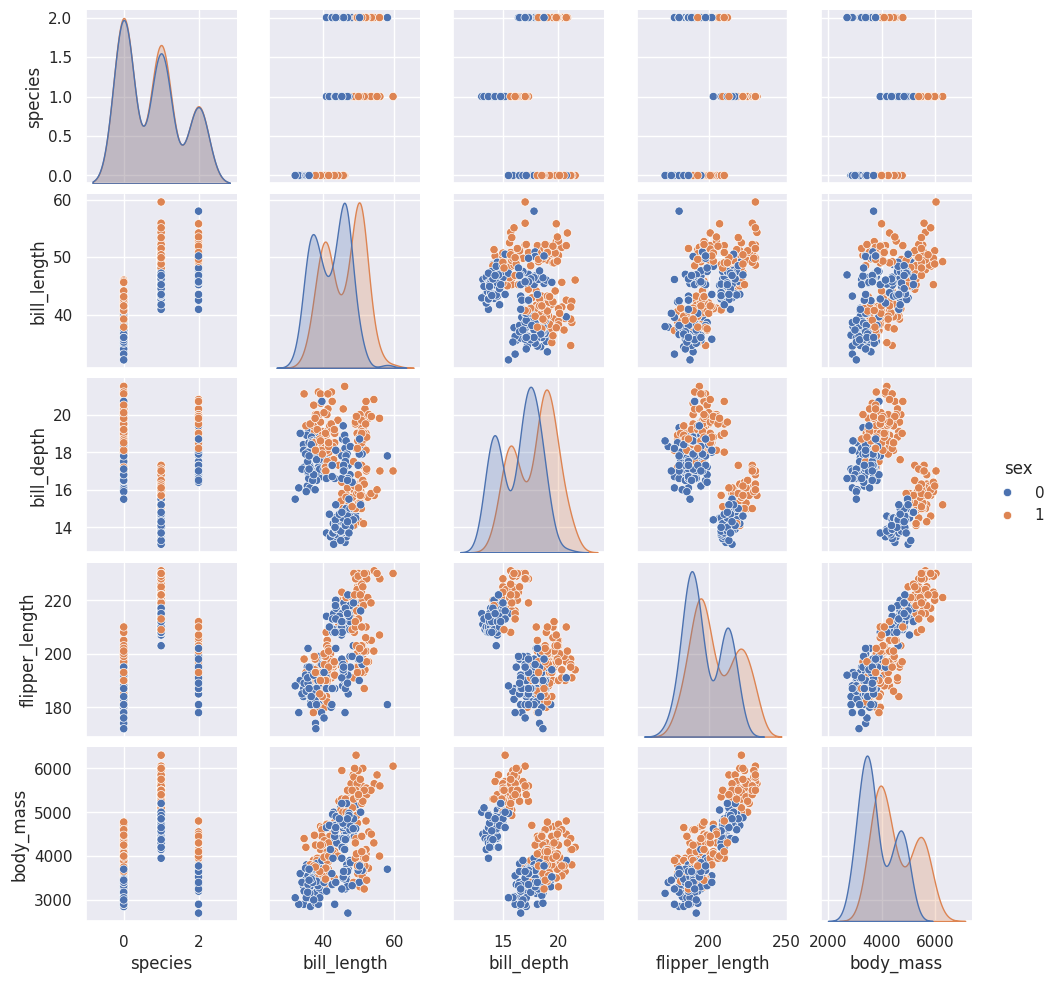

In [527]:
sns.pairplot(df, hue='sex', diag_kind='kde', height=2)
plt.show()

With the pair plot above, we have the following observations:

1. Firstly, the pair plot visualization confirms that the data range is within normal ranges, so no further data cleanup is required.

2. The diagonal plots confirmed that males in general have larger values in their physical measurements. So that using physical measurements to predict the gender is possible.
3. From the scatter plots, the best combination that sets the gender clusters apart is *bill_depth* and *body_mass*. 
4. The final observation is that different feature performs differently on different species, which can be seen from the plots at the first row. To further investigate the difference in species, we make more pair plots on each of the three species.

The last observation above shows the body ratios are different among species. The following pair plots are made for each species for further investigation.

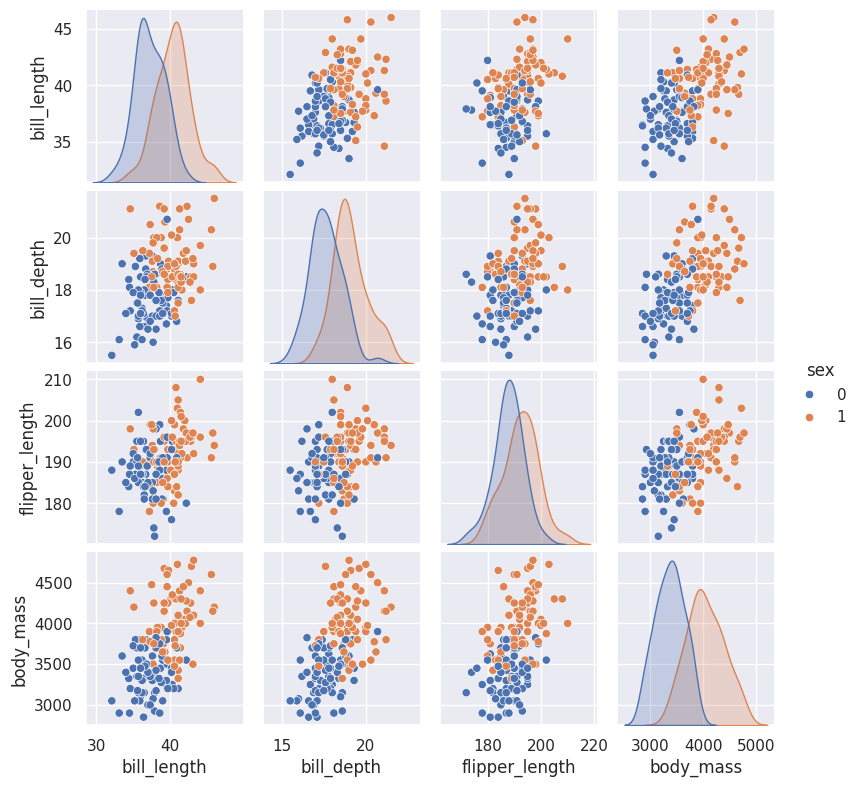

In [528]:
# Make a pairplot for species Adelie
adelie_df = df[df.species == 0]
adelie_df = adelie_df.drop(columns=['species'])
sns.pairplot(adelie_df, hue='sex', diag_kind='kde', height=2)
plt.show()

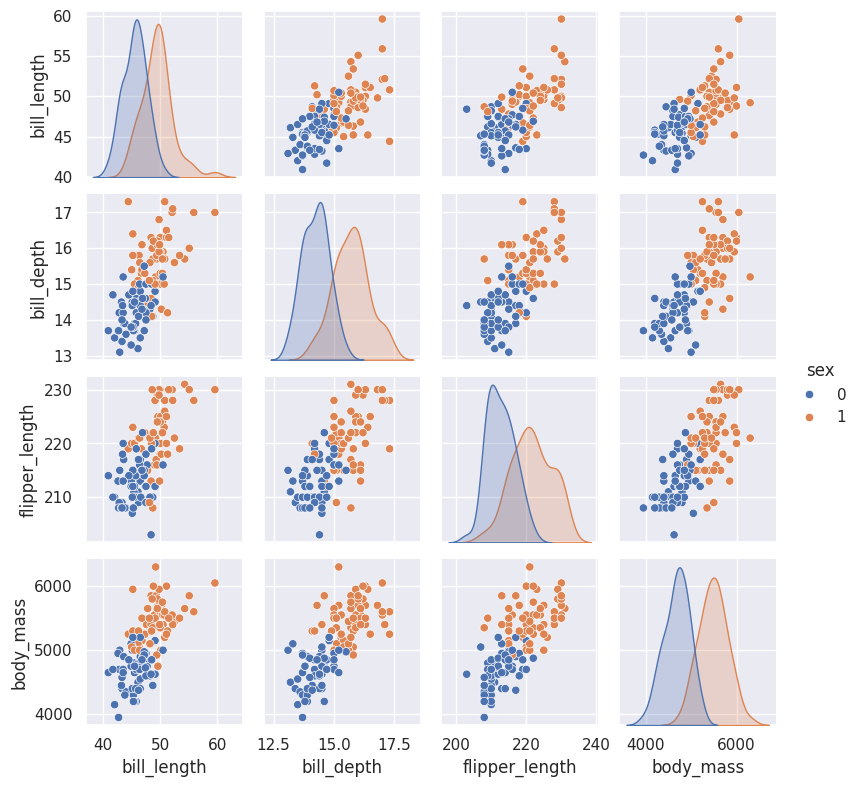

In [529]:
# Make a pairplot for species Gentoo
gentoo_df = df[df.species == 1]
gentoo_df = gentoo_df.drop(columns=['species'])
sns.pairplot(gentoo_df, hue='sex', diag_kind='kde', height=2)
plt.show()

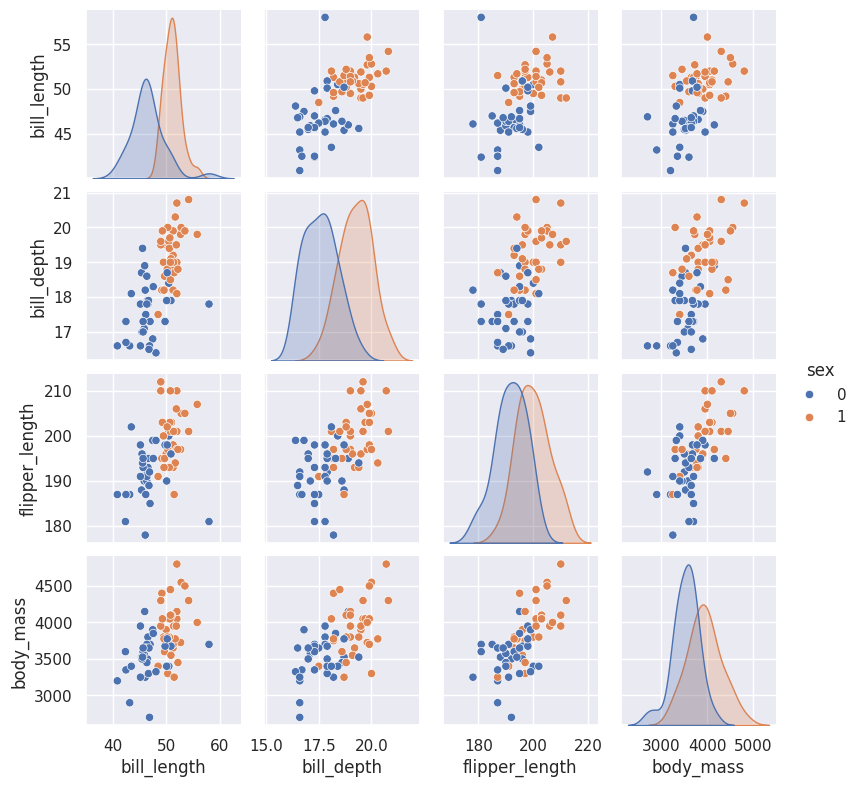

In [530]:
# Make a pairplot for species Chinstrap
chinstrap_df = df[df.species == 2]
chinstrap_df = chinstrap_df.drop(columns=['species'])
sns.pairplot(chinstrap_df, hue='sex', diag_kind='kde', height=2)
plt.show()

#### Discussion

From the pair plots above, it is evident that males tends to be larger across all the observed species. However, different features are affected by sexual difference differs across species. In the following sections, we will discuss how to properly address the difference among species.

### Building the model

In this section, we will start to build the model.

#### Baseline logistic regression

For binary classification problem, it is a good idea to start with a classical logistic regression as a baseline.

In [531]:
# Build up a logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

target = 5 # 'sex' column

train_X = train_set.iloc[:,:5].values
train_y = train_set.iloc[:,target].values
test_X = test_set.iloc[:,:5].values
test_y = test_set.iloc[:,target].values

LogReg = LogisticRegression(class_weight="balanced", solver="liblinear").fit(train_X, train_y)
LogReg.score(test_X, test_y)

0.835820895522388

Here we have a baseline score as **0.836**. In the following sections, we will try different techniques to improve the performance.


#### The strategy

In order to improve the prediction performance, we need to exploit the characteristics of the dataset.

The observation made in the EDA phase shows that the difference between sexes varies across different species. This observation suggests that we can use the species variable as a decision variable before further processing. 

Although a decision tree seems like a good model to fit this situation due to the variable of species being a good option to split the problem into sub-problems, it is not a suitable approach as it is prone to overfitting as we are working on a small dataset.

On the other hand, SVM is known to be robust on small dataset. One more benefit from using SVM is that the model tends to perform well with collinear dataset, which is the case in this project.

In the following sections, we will focus on **using sub-models** with species as a decision variable and comparing **logistic regression and SVM** before making the final decison on the desing of the model.

As the dataset is banlanced, we will solely use accuracy score for the performance measurement.

In [532]:
from sklearn.model_selection import train_test_split

# Define a class to keep the data
class ModelData:
    def __init__(self, train_X=None, test_X=None, train_y=None, test_y=None):
        self.train_X = train_X
        self.test_X = test_X
        self.train_y = train_y
        self.test_y = test_y

# Data preparation function to be used in the experiments
def get_subset_data(df, species, features=None, normalize=False, pca_component=0):
    sub_df = df[df.species == species]

    # using fixed random state to get the same result
    train_set, test_set = train_test_split(sub_df, test_size=0.2, random_state=42)

    target = 5 # 'sex' column

    if features is None:    # select all features (except species) if not specified
        features = [1, 2, 3, 4]

    train_X = train_set.iloc[:,features].values
    train_y = train_set.iloc[:,target].values
    test_X = test_set.iloc[:,features].values
    test_y = test_set.iloc[:,target].values

    if normalize == True:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        train_X = sc.fit_transform(train_X)
        test_X = sc.transform(test_X)

    if pca_component > 0:
            from sklearn.decomposition import PCA
            pca = PCA(n_components=pca_component)
            train_X = pca.fit_transform(train_X)
            test_X = pca.transform(test_X)

    return ModelData(train_X, test_X, train_y, test_y)

def experience_model(model, data):
    model.fit(data.train_X, data.train_y)
    y_hat = model.predict(data.test_X)
    accuracy = score(data.test_y, y_hat)
    print("test accuracy: ", accuracy)

**Sub-models using logistic regression**

First, we try to fit logistic regression models on each species and check their performance individually.

In [533]:
for i in range(3):
    data = get_subset_data(df, i)
    experience_model(LogisticRegression(class_weight="balanced", solver="liblinear"), data)

test accuracy:  0.9666666666666667
test accuracy:  0.7916666666666666
test accuracy:  0.5714285714285714


Although there shows a great improvement on the sub-dataset 0 (Adelie), the performance on the other two is very poor. 

Let's try the same with linear SVMs

In [534]:
for i in range(3):
    data = get_subset_data(df, i)
    experience_model(LinearSVC(C=1, loss='hinge', random_state=0, tol=1e-5), data)

test accuracy:  0.43333333333333335
test accuracy:  0.5
test accuracy:  0.5


/home/tianbo/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tianbo/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tianbo/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


There are warnings regarding convvergence during training. The performance is also very poor.

#### Normalization

The basic models above produces poor predictions. The SVM models show warnings for convergence during training, which is usually caused by large scale difference between features. In this case, the bill length and depth is indeed largely different in scale with the length of their flipper. To address this issue, we need to normalize the data.

Let's redo the above trails with normalization.

In [535]:
print('Logistic Regression')
for i in range(3):
    data = get_subset_data(df, i, normalize=True)
    experience_model(LogisticRegression(class_weight="balanced", solver="liblinear"), data)

print()
print('Linear SVC')
for i in range(3):
    data = get_subset_data(df, i, normalize=True)
    experience_model(LinearSVC(C=1, loss='hinge', random_state=0, tol=1e-5), data)

Logistic Regression
test accuracy:  0.9
test accuracy:  0.9166666666666666
test accuracy:  0.9285714285714286

Linear SVC
test accuracy:  0.9
test accuracy:  0.875
test accuracy:  0.9285714285714286


Also redo the Logistic Regression without sub-models using normalized data.

In [536]:
# Build up a logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

target = 5 # 'sex' column

train_X = train_set.iloc[:,:5].values
train_y = train_set.iloc[:,target].values

test_X = test_set.iloc[:,:5].values
test_y = test_set.iloc[:,target].values

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

LogReg = LogisticRegression(class_weight="balanced", solver="liblinear").fit(train_X, train_y)
LogReg.score(test_X, test_y)

0.8955223880597015

Normalization indeed improves the performance for both logistic regression models and linear SVM model. The warning of convergence during SVM training is also resolved after normalization. 

At this point, the performance of Logistic Regression models is slightly better than that of the SVM models. 

#### Experiencing PCA

As data preprocessing using normalization shows positive effect on the performance. In this section, we will explore another data preprocessing technique, namely PCA, to improve the performance by resolving the colliner issue.

In [537]:
print('Logistic Regression')
for i in range(3):
    data = get_subset_data(df, i, normalize=True, pca_component=2)
    experience_model(LogisticRegression(class_weight="balanced", solver="liblinear"), data)

print()
print('Linear SVC')
for i in range(3):
    data = get_subset_data(df, i, normalize=True, pca_component=2)
    experience_model(LinearSVC(C=1, loss='hinge', random_state=0, tol=1e-5), data)

Logistic Regression
test accuracy:  0.8666666666666667
test accuracy:  0.875
test accuracy:  0.9285714285714286

Linear SVC
test accuracy:  0.8666666666666667
test accuracy:  0.875
test accuracy:  1.0



The test result comparision for the effect of PCA approach is as follows. 

<style> 
    .result_table {font-size: smaller;}
    .result_table tr:nth-child(odd) { background-color: #eee; } 
    .result_table th {border: none;}
    .result_table td {border: none;}
    .center-header {text-align: center;}
</style> 

<table class="result_table" style="border-collapse: collapse;">
  <thead>
    <tr>
        <th></th>
        <th></th>
        <th colspan="2" class="center-header">Logistic Regression</th>
        <th colspan="2" class="center-header">SVM</th>
    </tr>
    <tr>
        <th>Index</th>
        <th align="right">Species</th>
        <th align="left">without PCA</th>
        <th align="left">with PCA</th>
        <th align="left">without PCA</th>
        <th align="left">with PCA</th>
    </tr>
  </thead>
  <tbody>  
    <tr>
        <td>0</td>
        <td>Adelie</td>
        <td>0.900</td>
        <td>0.867</td>
        <td>0.900</td>
        <td>0.867</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Gentoo</td>
        <td>0.917</td>
        <td>0.875</td>
        <td>0.875</td>
        <td>0.875</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Chinstrap</td>
        <td>0.929</td>
        <td>0.929</td>
        <td>0.929</td>
        <td>1.000</td>
    </tr>
  </tbody>
</table>

The PCA approach shows a great improvement on the Chinstrap sub-dataset for SVM model. However, the performance on the Adelie sub-dataset degenerates. As Adelie species has a larger population, the degeneration will cancel out some of the benefit brought on the Chinstrap species, which has a small population.

The possible reason of performance degeneration is that the information is lost during the dimension reduction. Adjusting the number of components does not help in this case.

Despite PCA is famous in resolving collinearity among features, it does not show much value in this project. For this reason, we will **not incorporate the PCA** technique into the final model.

With the plot on the test set, we can see that the data points are classified into two classes. In order to get a better prediction, in the next step, we will try to incorporate more features.

#### Features importance analysis

In the above section, we picked up two features out of four to train a model for the sake of visualization. In this section, we will investigate the importance of each feature in order to make the decision on the feature selection.

Both logistic regression and SVM do not inherently provide feature importance like some other models such as linear regression or decision tree. To measure the importance of the features, we instead use the magnitude of coefficients. For example, in linear SVMs, the coefficients assigned to each feature in the decision function indicate the feature's importance. Larger magnitude coefficients suggest higher importance. Similarily, we can check the coefficients for logistic regression for the same purpose.

test accuracy:  0.9
test accuracy:  0.9166666666666666
test accuracy:  0.9285714285714286


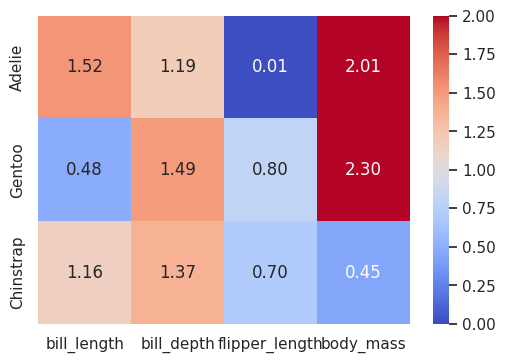

In [540]:
# Show the coefficients heatmap to identify important features (Logistic Regression)

coef = np.zeros((3, 4))
for i in range(3):
    data = get_subset_data(df, i, normalize=True)
    model = LogisticRegression(class_weight="balanced", solver="liblinear")
    experience_model(model, data)
    coef[i] = model.coef_[0]

# plot the coefficients as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(coef, annot=True, cmap='coolwarm', vmin=0.0, vmax=2.0, fmt='.2f', linewidths=0)
plt.xticks(ticks=np.arange(4)+0.5, labels=['bill_length', 'bill_depth', 'flipper_length', 'body_mass'])
plt.yticks(ticks=np.arange(3)+0.5, labels=species_names)
plt.show()


For Logistic Regression models, the importance of the features varies across the species. For Adelie and Gentoo, the body mass is the most imporant factor to differentiate the gender of the penguin, but it is the most unimportant factor for Chinstrap. For Chinstrap, it is the bill depth that tells the males apart from the females most efficiently.

test accuracy:  0.9
test accuracy:  0.875
test accuracy:  0.9285714285714286


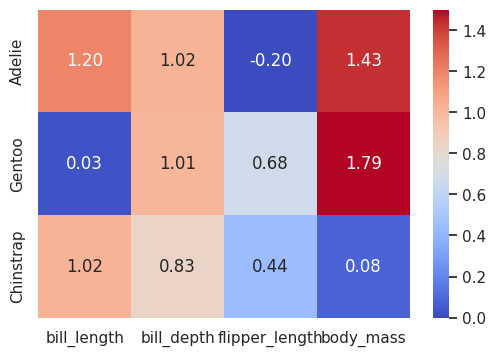

In [541]:
# Show the coefficients heatmap to identify important features (linear SVM)

# keep all coefficients in a np array
coef = np.zeros((3, 4))
for i in range(3):
    data = get_subset_data(df, i, normalize=True)
    lsvm = LinearSVC(C=1, loss='hinge', random_state=0, tol=1e-5)
    experience_model(lsvm, data)
    coef[i] = lsvm.coef_[0]

# plot the coefficients as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(coef, annot=True, cmap='coolwarm', vmin=0.0, vmax=1.5, fmt='.2f', linewidths=0)
plt.xticks(ticks=np.arange(4)+0.5, labels=['bill_length', 'bill_depth', 'flipper_length', 'body_mass'])
plt.yticks(ticks=np.arange(3)+0.5, labels=species_names)
plt.show()


We can observe similar pattern using SVM models. Comparing to the result of using Logistic Regression, the feature ranking for each species are almost identical. Athe the same time, the feature ranking hugely differs from each other across species, which confirms the need of using sub-models.

Additionally, we can also observe that flipper_length is not important for all species in the models. We can try to remove it to see if there is any improvement on the performance.

In [542]:
print('Logistic Regression')
for i in range(3):
    data = get_subset_data(df, i, features=[1,2,4], normalize=True)
    experience_model(LogisticRegression(class_weight="balanced", solver="liblinear"), data)

print()
print('Linear SVC')
for i in range(3):
    data = get_subset_data(df, i, features=[1,2,4], normalize=True)
    experience_model(LinearSVC(C=1, loss='hinge', random_state=0, tol=1e-5), data)

Logistic Regression
test accuracy:  0.9
test accuracy:  0.9166666666666666
test accuracy:  0.9285714285714286

Linear SVC
test accuracy:  0.9
test accuracy:  0.8333333333333334
test accuracy:  1.0


As a conclusion, even though flipper_length does not contribute much to the prediction of penguin gender, removing it does not show improvement on the performance in terms of the accuracy. Adding that the total number of features is small (4, excluding *species*, which will be used as decision variable), we will **keep all the features as input**.

#### Non-linear model

We were using linear SVM models so far. In this section, we will explore with SVM using RBF kernel.

In [543]:
for species in range(3):
    data = get_subset_data(df, species, normalize=True)
    nlsvm = SVC(C=2, kernel='rbf', gamma=0.25, random_state=0)
    experience_model(nlsvm, data)

test accuracy:  0.9
test accuracy:  0.9583333333333334
test accuracy:  0.8571428571428571


The test results are

<style> 
    .result_table {font-size: smaller;}
    .result_table tr:nth-child(odd) { background-color: #eee; } 
    .result_table th {border: none;}
    .result_table td {border: none;}
    .result_table td:nth-child(3n+2) { text-align:right; }
</style> 
<table class="result_table" style="border-collapse: collapse;">
    <tr>
        <th>Index</th>
        <th align="right">Species</th>
        <th align="left">Score using linear model</th>
        <th align="left">Score using non-linear model</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Adelie</td>
        <td>0.900</td>
        <td>0.900</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Gentoo</td>
        <td>0.875</td>
        <td>0.958</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Chinstrap</td>
        <td>0.929</td>
        <td>0.857</td>
    </tr>
</table>

Using non-linear model shows improvement and degeneration at the same time. However, as the non-linear model has hyperparameter C and gamma to be adjusted, it is more flexible than the linear model. For this reason, we will **continue to use the non-linear model**. We will discuss the possible overfitting issue introduced by non-linear model later.


#### Logistic Regression vs SVM

So far the Logistic Regression models and SVM models behave with similar performance. However, as there is little room to fine-tune the Logistic Regression models, it is better to use SVMs and continue tunning the hyper-parameter for better performance.

#### Conclusion of the model selection

In this section, we experienced a couple of techniques towards building up the final model. What is learned includes:

1. Normalization of the features is critical to the performance;

2. Using sub-models to adapt to the difference among species is beneficial to the performance;
3. It is not necessary to incorporate PCA for this dataset;
4. It is not necessary to drop any feature;
5. Using SVM model provides more room for fine-tunning comparing to Logistic Regression models

With the observations above, we can finalize the model in the next section.

#### The Final model

Based on the discussions above, we can derieve our model as follows.

The model consists of three nonlinear SVMs for each species. The model will choose proper sub-model for given observation to make the prediction. The input data will be normalized before passing to the sub-models for training and predicting. 

The hyper-parameter tunning will be done during the training phase with grid search on the training data. 

In [544]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

class PenguinGenderModel:
    """
    A class to classify penguin gender based on their species specific physical measurments.
    """
    def __init__(self, species):
        self.species = species
        self.num_species = len(species)
        self._sub_models = [None]*self.num_species  # Keep the sub-models for each species
        self._scalers = [None]*self.num_species  # Keep the scalers for each species to normalize the data

    def fit(self, train_set):
        """
        Fit the model using the training data.
        Args:
        - train_set: The original training data frames, including the species column.
        """
        for i in range(self.num_species):
            species_df = train_set[train_set.species == i]
            train_X = species_df.iloc[:,slice(1,5)].values
            train_y = species_df.iloc[:,5].values

            self._scalers[i] = StandardScaler()
            train_X = self._scalers[i].fit_transform(train_X)

            print('species: ', species_names[i])
            self._sub_models[i] = self._grid_search_fit(train_X, train_y)

    def predict(self, test_set):
        """
        Predict the gender of the penguins.
        Args:
        - test_set: The original test data frames, including the species column.
        Returns:
        - The classification results. 0: female, 1: male
        """
        y_hats = None
        for i in range(self.num_species):
            species_df = test_set[test_set.species == i]
            if species_df.shape[0] == 0:
                continue

            test_X = species_df.iloc[:,slice(1,5)].values
            test_X = self._scalers[i].transform(test_X)

            # The original data is organized by the species, so the concatenated output will follow the same order as the input
            y_hat = self._sub_models[i].predict(test_X)
            if y_hats is None:
                y_hats = y_hat
            else:
                y_hats = np.concatenate((y_hats, y_hat))

        return y_hats

    def _grid_search_fit(self, X, y):
        """
        Perform grid search to find the best hyperparameters for the model.
        Args:
        - X: The training data.
        - y: The labels.
        Returns:
        - The best model.
        """

        parameters = {'C':[2**i for i in range(-3, 3)], 'gamma':[2**i for i in range(-3, 3)]}

        grid_search = GridSearchCV(SVC(), parameters, cv=3)
        grid_search.fit(X, y)
        print('best param: ', grid_search.best_params_)
        print('best train score: ', grid_search.best_score_)

        return grid_search.best_estimator_

def split_data_by_species(df):
    """
    Split the data into training set and test set. Each set contains data for each species with the same ratio.
    Args:
    - df: The original data.
    Returns:
    - train_set: The training set, including data for all species.
    - test_set: The test set, including data for all species.
    """
    species = df.species.unique()
    assert(len(species) == 3)
    assert(min(species) == 0 and max(species) == 2)

    for s in species:
        species_df = df[df.species == s]
        train_set, test_set = train_test_split(species_df, test_size=0.2, random_state=42)
        if s == 0:
            train_set_all = train_set
            test_set_all = test_set
        else:
            train_set_all = pd.concat([train_set_all, train_set])
            test_set_all = pd.concat([test_set_all, test_set])

    return train_set_all, test_set_all

**The consideration to avoid overfitting**

The penguin dataset is small thus tends to be overfitted. We chose the SVM to be less prone to the overfitting problem. Further more, in the grid searching phase to select hyper-parameter, we restrict both the C value and gamma from $2^{-3}$ to $2^3$ to avoid possible high variance that could leads to an overfitting.

In [545]:
penguin_gender_model = PenguinGenderModel(species_names)
train_set, test_set = split_data_by_species(df)

# training
penguin_gender_model.fit(train_set)

# testing

print("")
print("testing")
print("")

# 1. accuracy for each species
for i in range(3):
    species_df = test_set[test_set.species == i]
    y_hat = penguin_gender_model.predict(species_df)
    test_y = species_df.iloc[:,5].values
    accuracy = score(test_y, y_hat)
    print("species: ", species_names[i], " accuracy: ", accuracy)

# 2. overall accuracy
y_hat = penguin_gender_model.predict(test_set)
test_y = test_set.iloc[:,5].values
accuracy = score(test_y, y_hat)
print("overall test accuracy: ", accuracy)



species:  Adelie
best param:  {'C': 0.5, 'gamma': 0.5}
best train score:  0.9397210976158344
species:  Gentoo
best param:  {'C': 0.25, 'gamma': 0.125}
best train score:  0.957997311827957
species:  Chinstrap
best param:  {'C': 0.5, 'gamma': 0.25}
best train score:  0.9259259259259259

testing

species:  Adelie  accuracy:  0.9
species:  Gentoo  accuracy:  0.9166666666666666
species:  Chinstrap  accuracy:  1.0
overall test accuracy:  0.9264705882352942


Using the strategy mentioned above, we are able to achive overall accuracy as **0.926**, which is an improvement comparing to the baseline score **0.836** from the basic Logistic Regression model.

The ROC curve of the final model is presented below:

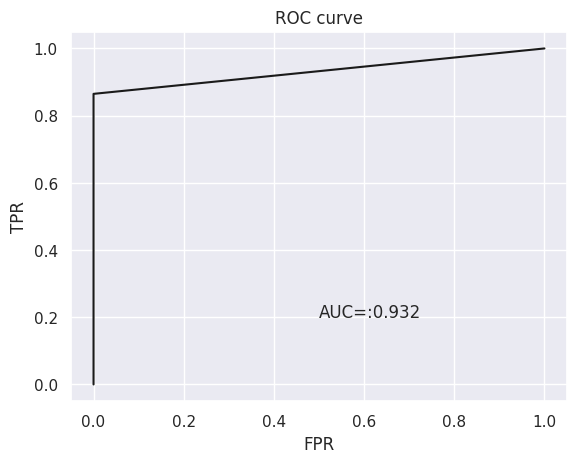

In [546]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, th = roc_curve(test_set['sex'], y_hat)
auc = roc_auc_score(test_set['sex'], y_hat)
plt.plot(fpr, tpr, 'k-')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.5, 0.2, 'AUC='+":{:.3F}".format(auc));


The following table summaries the results using different models and techniques.

<style> 
    .result_table {font-size: smaller;}
    .result_table tr:nth-child(odd) { background-color: #eee; } 
    .result_table th {border: none;}
    .result_table td {border: none;}
    .center-header {text-align: center;}
</style> 
<table class="result_table">
<thead>
  <tr><th></th><th></th><th></th><th></th><th></th><th></th>
        <th colspan="3" class="center-header">Species specific scores</th>
        <th></th><th></th></tr>
<tr><th>Index</th><th>Model</th><th>with sub-models</th><th>normalized</th><th>PCA</th><th>drop feature</th><th>Adelie</th><th>Gentoo</th><th>Chinstrap</th><th>Overall score</th><th>Comments</th></tr>
</thead>
<tbody>
<tr><td>1</td><td>Logistic Regression</td><td>No</td><td>No</td><td>No</td><td>No</td><td></td><td></td><td></td><td>0.836</td><td>Baseline</td></tr>
<tr><td>2</td><td>Logistic Regression</td><td>Yes</td><td>No</td><td>No</td><td>No</td><td>0.967</td><td>0.792</td><td>0.571</td><td>0.824 </td><td></td></tr>
<tr><td>3</td><td>Logistic Regression</td><td>No</td><td>Yes</td><td>No</td><td>No</td><td></td><td></td><td></td><td>0.896</td><td></td></tr>
<tr><td>4</td><td>Logistic Regression</td><td>Yes</td><td>Yes</td><td>No</td><td>No</td><td>0.900</td><td>0.917</td><td>0.929</td><td>0.912 </td><td></td></tr>
<tr><td>5</td><td>Linear SVM</td><td>Yes</td><td>Yes</td><td>No</td><td>No</td><td>0.900</td><td>0.875</td><td>0.929</td><td>0.897 </td><td></td></tr>
<tr><td>6</td><td>Logistic Regression</td><td>Yes</td><td>Yes</td><td>Yes</td><td>No</td><td>0.867</td><td>0.875</td><td>0.929</td><td>0.883 </td><td></td></tr>
<tr><td>7</td><td>Linear SVM</td><td>Yes</td><td>Yes</td><td>Yes</td><td>No</td><td>0.867</td><td>0.875</td><td>1.000</td><td>0.897 </td><td></td></tr>
<tr><td>8</td><td>Logistic Regression</td><td>Yes</td><td>Yes</td><td>No</td><td>Yes</td><td>0.900</td><td>0.917</td><td>0.929</td><td>0.912 </td><td></td></tr>
<tr><td>9</td><td>Linear SVM</td><td>Yes</td><td>Yes</td><td>No</td><td>Yes</td><td>0.900</td><td>0.833</td><td>1.000</td><td>0.896 </td><td></td></tr>
<tr><td>10</td><td>Non-linear SVM</td><td>Yes</td><td>Yes</td><td>No</td><td>No</td><td>0.900</td><td>0.958</td><td>0.857</td><td>0.912 </td><td></td></tr>
<tr><td>11</td><td>Non-linear SVM</td><td>Yes</td><td>Yes</td><td>No</td><td>No</td><td>0.900</td><td>0.917</td><td>1.000</td><td>0.926</td><td>Final model</td></tr>
</tbody>
</table>

### Conclusion

In the process of building the model, we compared using one single model with using a set of sub-models based on the decision variable, i.e. the species, and noticed that borrowing the concept from decision tree helped improving the model performance. We tried both logistic regression model and SVM model (both linear and non-linear) and decided using SVM for its superior flexibility. Regarding the manipulation on the features, we tried the normalization technique and found its usefulness. We also experienced using PCA to reduce input dimension and resolve the collinear input but it shows little improvement thus not adopted. We did not drop any feature after evaluating on their importance ranking and noticed reducing the number of features is not a suitable choice considering the feature space is already relatively small. 